In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# concerns and their distribution
X = ['Front seat audio/entertainment/navigation controls',
     'Bluetooth system is difficult to use',
     'Steering system/wheel has too much play',
     'Bluetooth system has poor sound quality',
     'Hesitation or delay when shifting',
     'Excessive wind noise',
     'Seat material concerns',
     'Engine makes abnormal/excessive noise',
     'Tires make excessive noise while driving',
     'Engine power is less than expected']
Y = [8.2, 8.6, 8.8, 10.0, 10.3, 11.0, 11.6, 11.6, 12.3, 12.9]

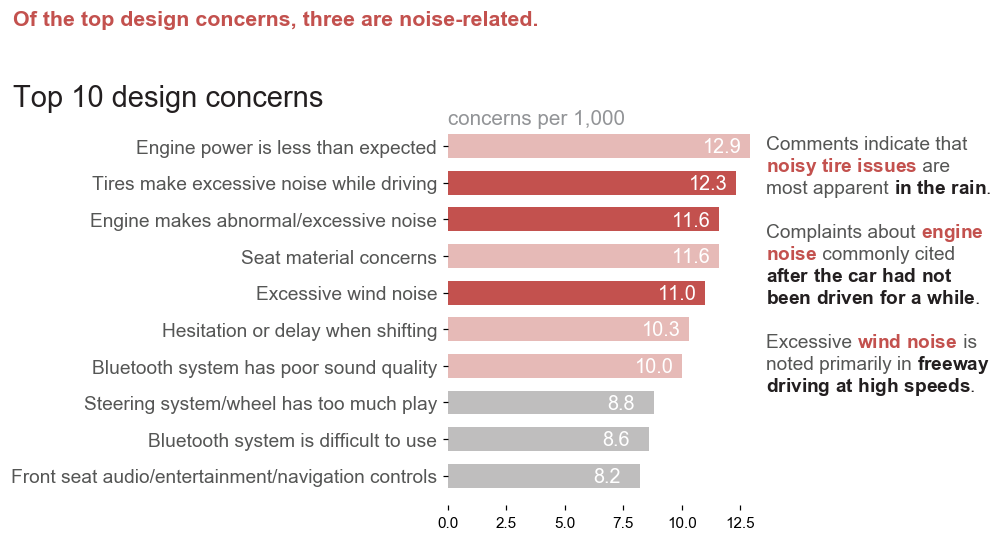

In [6]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-18.6, 10.1, 'Top 10 design concerns', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, 'Of the top design concerns, three are noise-related.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, 'concerns per 1,000', fontsize='13.5', color=GRAY7)

# add text note with concerns description
rainbow_text(
    13.6, 2.3,
    'Comments indicate that\n'
    '$\\bf{noisy\ tire\ issues}$|| are\n'
    'most apparent ||$\\bf{in\ the\ rain}$.\n'
    ' \n'
    'Complaints about ||$\\bf{engine}$\n'
    '$\\bf{noise}$|| commonly cited\n'
    '$\\bf{after\ the\ car\ had\ not}$\n'
    '$\\bf{been\ driven\ for\ a\ while}$.\n'
    ' \n'
    'Excessive ||$\\bf{wind\ noise}$|| is\n'
    'noted primarily in ||$\\bf{freeway}$\n'
    '$\\bf{driving\ at\ high\ speeds}$.',
    [[GRAY3], [RED1, GRAY3], [GRAY3, GRAY1],
     [GRAY1],
     [GRAY3, RED1], [RED1, GRAY3], [GRAY1], [GRAY1],
     [GRAY1],
     [GRAY3, RED1, GRAY3], [GRAY3, GRAY1], [GRAY1]],
    spacing=22,
    ax=ax1,
    fontsize=12.5)

plt.show()